## Initial Grid Search

In [1]:
from utilities import *
from plot_utilities import *

np.random.seed(42)

In [2]:
# Note that the code below assumes you are in the "testing-framework" directory. Can check Current Working Directory below:
# Should end with 'hierarchical-bayesian-model-validation/testing-framework'
os.getcwd()
# os.chdir

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\testing-framework'

In [3]:
''' Only need to run commented code once '''
DATA_NAME = 'panoptic'

# data_dict = pd.read_pickle('../data/Panoptic Agriculture/Transformed Dataset/Panoptic_Data_Dict_Normalized.pickle')
# obs_x_dict = dict()
# for layer in np.arange(2, 9):
#     obs_x_dict[layer] = create_obs_x(data_dict, layer)
# pd.to_pickle(obs_x_dict, f'{DATA_NAME}/obs_x_dict.pickle')

# master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df.csv', index_col = 'layer')
obs_x_dict = pd.read_pickle(f'{DATA_NAME}/obs_x_dict.pickle') # Already sorted
obs_x_dict

{2: array([-99.93568594, -91.00645124, -88.54430615, ...,  88.80035968,
         91.52850405,  94.44944672]),
 3: array([-76.13432886, -63.02074639, -60.52416619, ...,  65.19608846,
         65.26965934,  69.44498554]),
 4: array([-51.73647153, -48.46756551, -45.83266202, ...,  48.25087164,
         50.33643736,  64.88734264]),
 5: array([-47.95678457, -43.34915759, -36.2290875 , ...,  36.11999915,
         38.35812055,  42.17747737]),
 6: array([-23.87540781, -23.66829959, -23.29668418, ...,  25.41955052,
         31.52717851,  44.79754701]),
 7: array([-19.12997336, -18.52962064, -17.2224645 , ...,  16.63923718,
         17.96650462,  20.30569957]),
 8: array([-18.71256003, -17.84609759, -16.94317757, ...,  15.43083627,
         16.78232461,  20.5891778 ])}

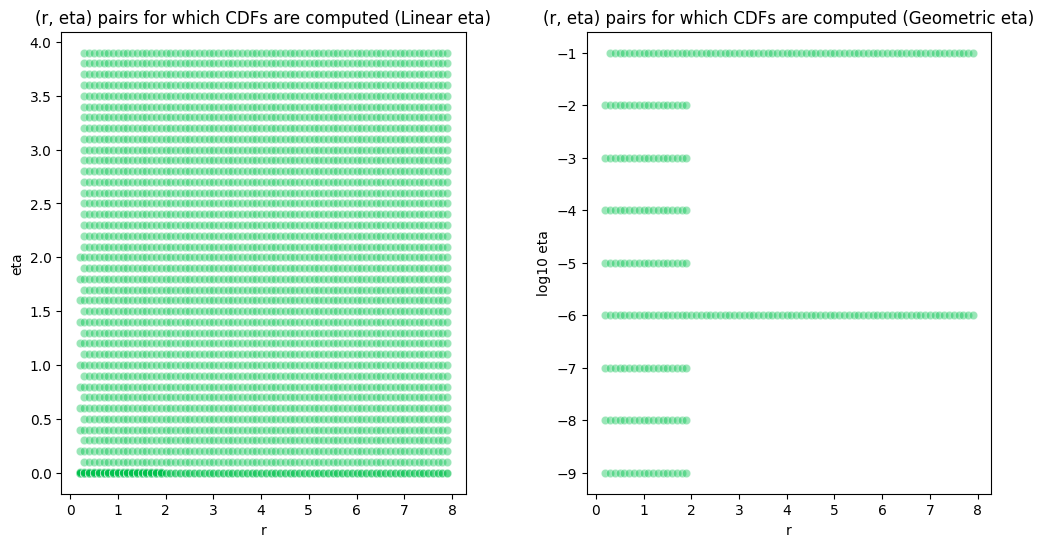

In [4]:
# Large grid search CDFs already computed (r = 0 to 8, eta = 0 to 3.9)
all_cdfs = combine_pickles('scipy_10000') | combine_pickles('mtlb_10000') 
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])

create_scatter_plots_log_eta(all_cdfs_df)

In [6]:
''' Only need to run commented code once'''
# master_df = pd.DataFrame(columns = ['layer', 'num_samples', 'initial_param', 'kstest_stat_initial', 'best_param_eta_0', 'kstest_stat_eta0'])
# idx_eta0 = [i for i, param in enumerate(sorted(all_cdfs)) if np.isclose(param[1], 0, atol = 1e-40)]
# sorted_params = sorted(all_cdfs)
# for i, layer in enumerate(np.arange(2, 9)):
#     sample = obs_x_dict[layer]
#     ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs)
#     ksstats_eta0 = [ksstats[i] for i in idx_eta0]
#     idx_min_ksstats_eta0 = idx_eta0[np.argmin(ksstats_eta0)]
#     master_df.loc[i, :] = [layer, sample.size, initial_param, min_stat, sorted_params[idx_min_ksstats_eta0], ksstats[idx_min_ksstats_eta0]]
# master_df = master_df.set_index('layer')
# master_df.to_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/initial_eta0_grid.csv', index_col='layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0
layer,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259


In [7]:
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0
layer,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259


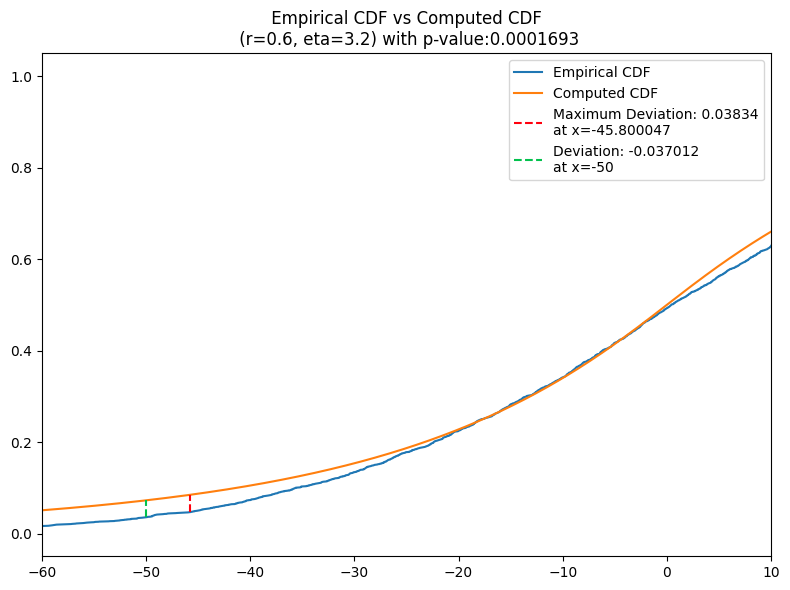

In [8]:
layer = 2
visualize_cdf(obs_x_dict[layer], 
              all_cdfs = all_cdfs, 
              params= master_df.loc[layer, 'initial_param'], 
              n_samples=10000, interval = (-60, 10), 
              provided_loc = -50);

In [9]:
# Given that pvalue = 0.05 and I have n samples, what should the kstest statistic be?
# Note how as num_samples increases by a factor of 4, the cutoff decreases by a factor of 2
# Could potentially include the plot in `images/loglog_pvalue_numsamples.png` 

for layer in np.arange(2, 9):
    num_points = obs_x_dict[layer].size
    master_df.loc[layer, 'kstest_stat_cutoff_0.05'] = stats.kstwo(n=num_points).isf(0.05)    
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05
layer,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376


In [10]:
r_d, eta_d = 4, 2 # Controls precision to which parameters are optimized

# for layer in np.arange(8, 9): 
#     sample = obs_x_dict[layer]
#     initial_param = master_df.loc[layer, 'initial_param']
#     master_df.loc[layer, f'best_r_d{r_d}'], master_df.loc[layer, f'best_eta_d{eta_d}'] = coord_descent_gengamma(sample, initial_param, r_depth = r_d, eta_depth=eta_d, layer=layer)
#     master_df.loc[layer, 'kstest_stat_cd'] = compute_ksstat(sample, combine_pickles(f'layer{layer}_10000')[(master_df.loc[layer, f'best_r_d{r_d}'], master_df.loc[layer, f'best_eta_d{eta_d}'])])
#     print(f"Layer {layer} best parameters: {master_df.loc[layer, 'kstest_stat_cd']}")

# master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_cd'], row.loc['num_samples']), axis = 1)    
# master_df[['num_samples', 'initial_param', 'kstest_stat_initial', f'best_r_d{r_d}', f'best_eta_d{eta_d}', 'kstest_stat_cd', 'n_pval_0.05']].to_csv('{DATA_NAME/CSVs/optimized_params.csv')
# master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv')

master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_optimize.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,best_r_d4
layer,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,0.6020
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,0.7048
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,0.8026
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,0.9011
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,1.0280
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,4.6290
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,5.7010


## Comparing Empirical and Computed CDF/PDF

In [21]:
def visualize_cdf_pdf(sample, params, distro = 'gengamma', log_scale = True, n_samples=10000, interval = None, provided_loc = None, all_cdfs=None, layer=None, bw = 0.05, bw_log = 0.05):
    """
    Visualize the gap between the empirical CDF/PDF and the Computed CDF/PDF.

    Args:
        sample (np.ndarray): Observed data.
        r (float): r value.
        eta (float): eta value.
        n_samples (int): Number of samples for the computed CDF/PDF.
        all_cdfs (dict): Dictionary containing computed CDFs.
        layer (int or None): Layer index (for titling purposes).

    Returns:
        distance (float): The Kolmogorov-Smirnov statistic.
        location (float): The location of the maximum deviation between the empirical and computed CDFs.
    """
    xs = np.linspace(np.min(sample), np.max(sample), 10000)
    sample = np.sort(sample)
    n = len(sample)
    
    if distro == 'gengamma':
        r, eta = params
        if all_cdfs and (r, eta) in all_cdfs:
            null_cdf = all_cdfs[(r, eta)]
        else:
            null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples)
        xs_pdf, computed_pdf = compute_prior_pdf(r, eta, tail_bound=0.01)
    elif distro == 'gaussian' or distro == 'normal':
        null_cdf = stats.norm(scale=params).cdf
        xs_pdf = np.linspace(-30, 30, 10000)
        computed_pdf = stats.norm(scale=params).pdf(xs)
    elif distro == 'laplace':
        null_cdf = stats.laplace(scale=params).cdf
        xs_pdf = np.linspace(-30, 30, 10000)
        computed_pdf = stats.laplace(scale=params).pdf(xs)

    if log_scale:

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        ax1.plot(xs, null_cdf(xs), label='Computed CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)

        ax1.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', label=f'Maximum Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', color='xkcd:bright red')
        if provided_loc:
            emp_cdf_at_provided_loc = np.searchsorted(sample, provided_loc, side='right') / n
            computed_cdf_at_provided_loc = null_cdf(provided_loc)
            ax1.vlines(provided_loc, emp_cdf_at_provided_loc, computed_cdf_at_provided_loc, linestyles='--', label=f'Deviation: {np.round(emp_cdf_at_provided_loc - computed_cdf_at_provided_loc, 6)}\nat x={np.round(provided_loc, 6)}', color='xkcd:shamrock green')
        if distro == 'gengamma':
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n (r={r}, eta={eta}) with p-value:{np.round(result.pvalue, 8)}')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n (r={r}, eta={eta})')
            ax3.set_title(f'{f"Layer {layer}" if layer else ""} Log Scale:\n Empirical PDF vs Computed PDF (r={r}, eta={eta})')
        else:
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n {distro} (0, {params})')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n {distro} (0, {params})')
            ax3.set_title(f'{f"Layer {layer}" if layer else ""} Log Scale:\n Empirical PDF vs Computed PDF {distro} (0, {params})')

        # Empirical PDF vs Computed PDF
        ax2.set_xlim(left = -25, right = 25)
        if interval:
            ax2.set_xlim(left = interval[0], right = interval[1])
        
        sns.kdeplot(sample, bw_method = bw, ax=ax2, label=f'Empirical PDF (KDE, bw={bw})')
        ax2.plot(xs_pdf, computed_pdf, label='Computed PDF')
        
        # Log Scale
        ax3.set_xlim(left = -25, right = 25)
        if interval:
            ax3.set_xlim(left = interval[0], right = interval[1])
        ax3.set_ylim(bottom = 10**-4, top=10)
        sns.kdeplot(ax = ax3, x = sample, bw_method = bw, log_scale=[False, True], label = f"Empirical PDF (KDE, bw={bw_log})")
        ax3.plot(xs_pdf, computed_pdf, label = "Computed PDF")

        ax1.legend()
        ax2.legend()
        ax3.legend()

        plt.tight_layout()
        plt.show()

    else:

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        ax1.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        ax1.plot(xs, null_cdf(xs), label='Computed CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)
        ax1.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', label=f'Maximum Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', color='xkcd:bright red')
        if distro =='gengamma':
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n (r={r}, eta={eta}) with p-value:{np.round(result.pvalue, 8)}')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n (r={r}, eta={eta})')
        else:
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n {distro} (0, {params})')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n {distro} (0, {params})')
        ax1.legend()

        # Empirical PDF vs Computed PDF
        ax2.set_xlim(left = -25, right = 25)
        sns.kdeplot(sample, bw_method = bw, ax=ax2, label=f'Empirical PDF (KDE, bw={bw})')
        ax2.plot(xs_pdf, computed_pdf, label='Computed PDF')
        ax2.legend()
    
    return fig

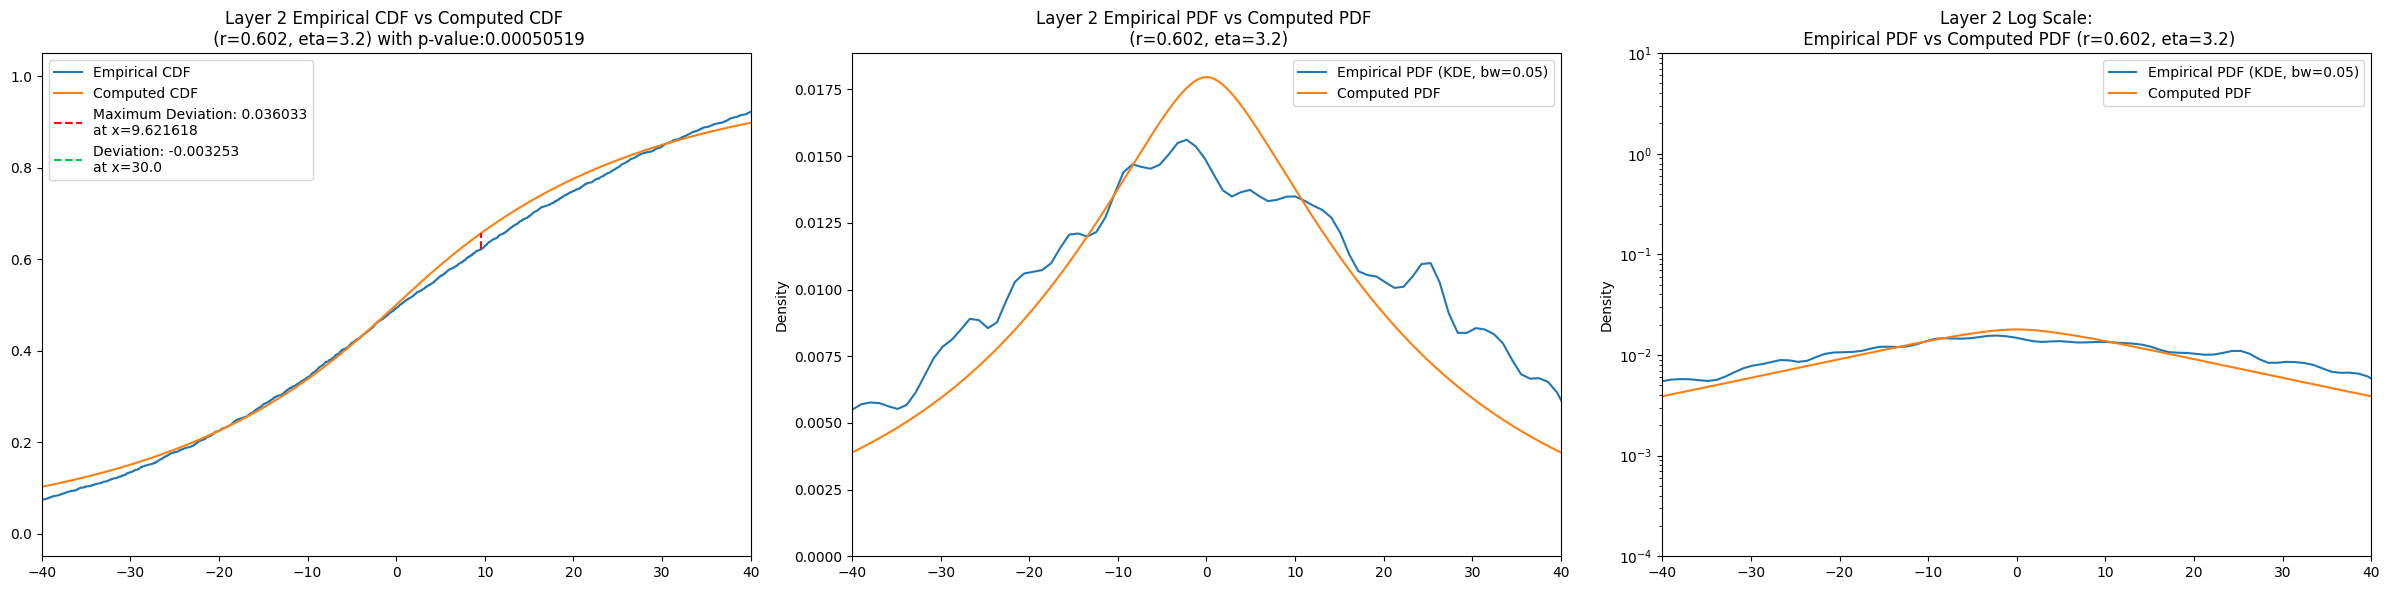

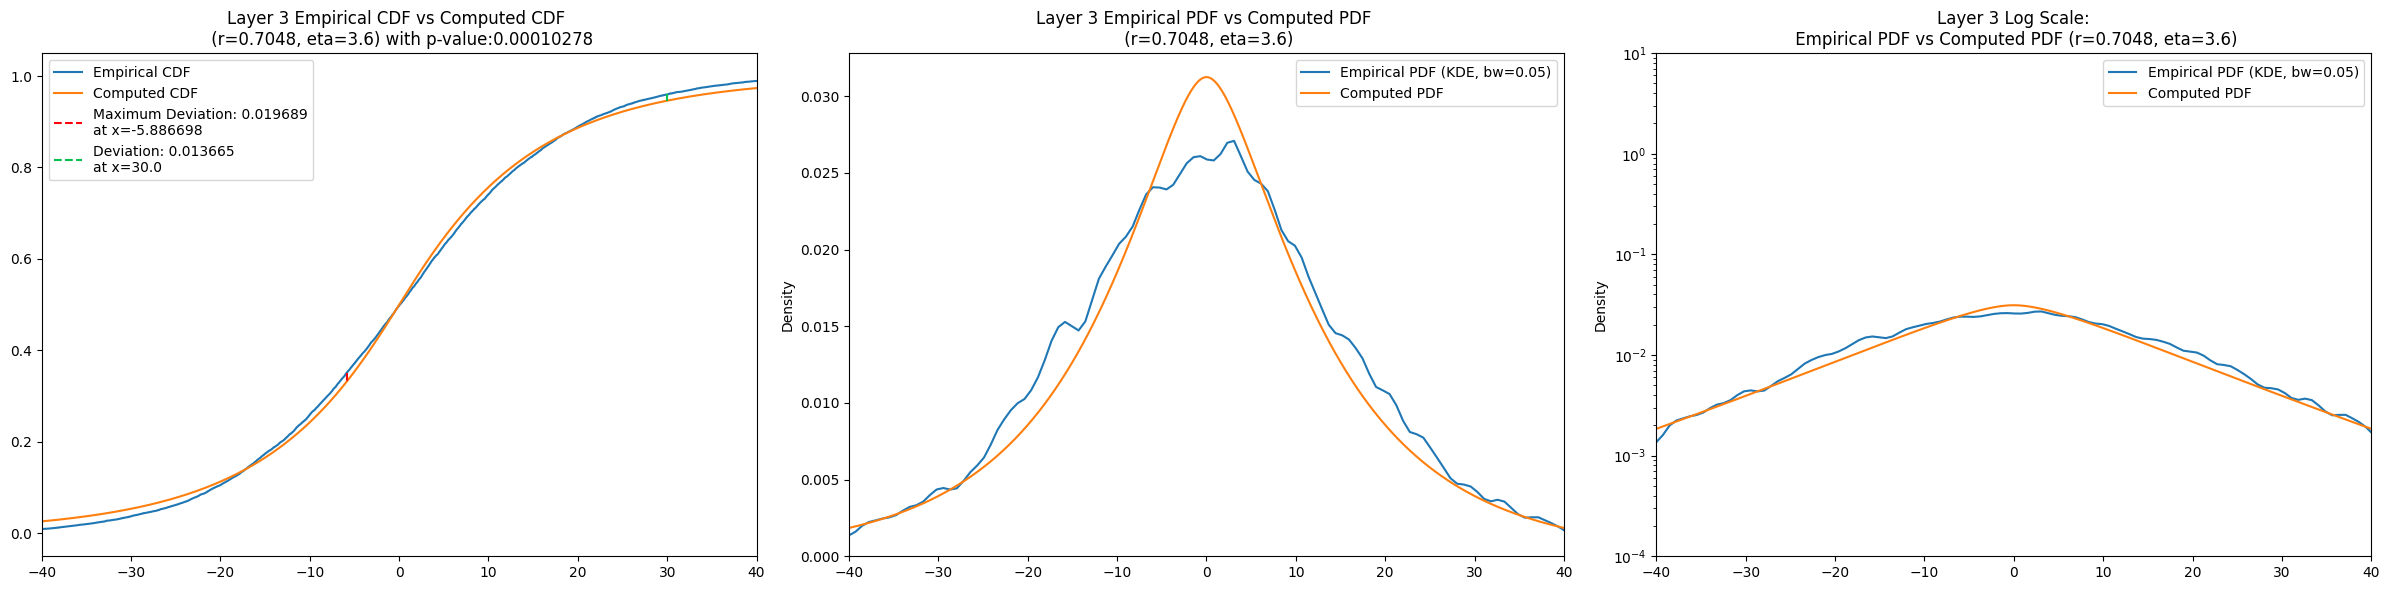

No Tail


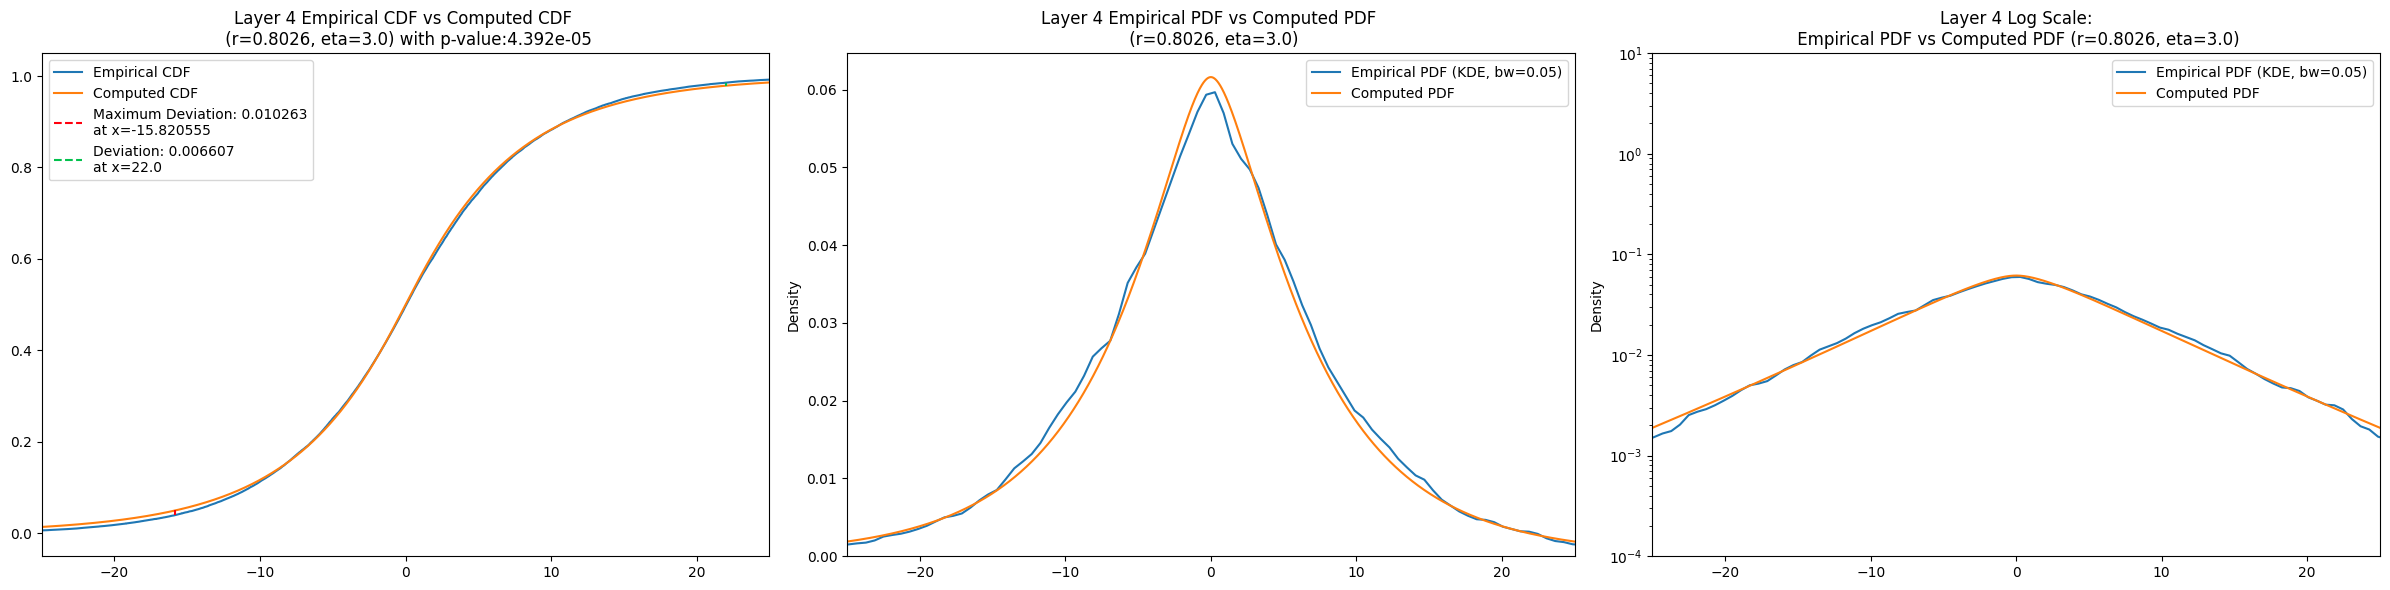

No Tail


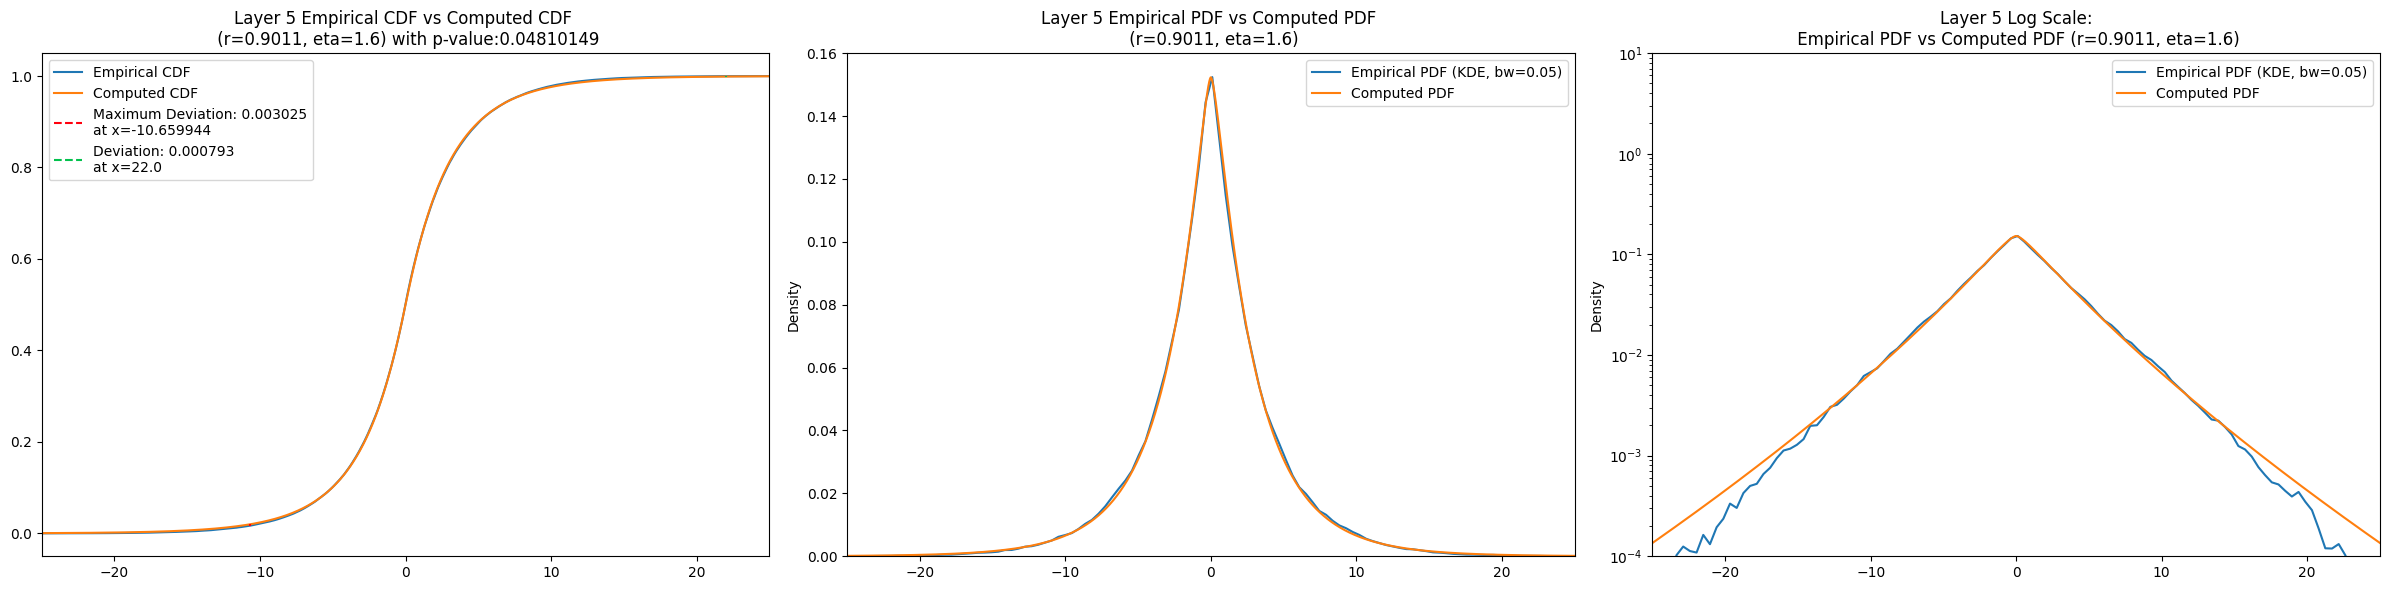

No Tail


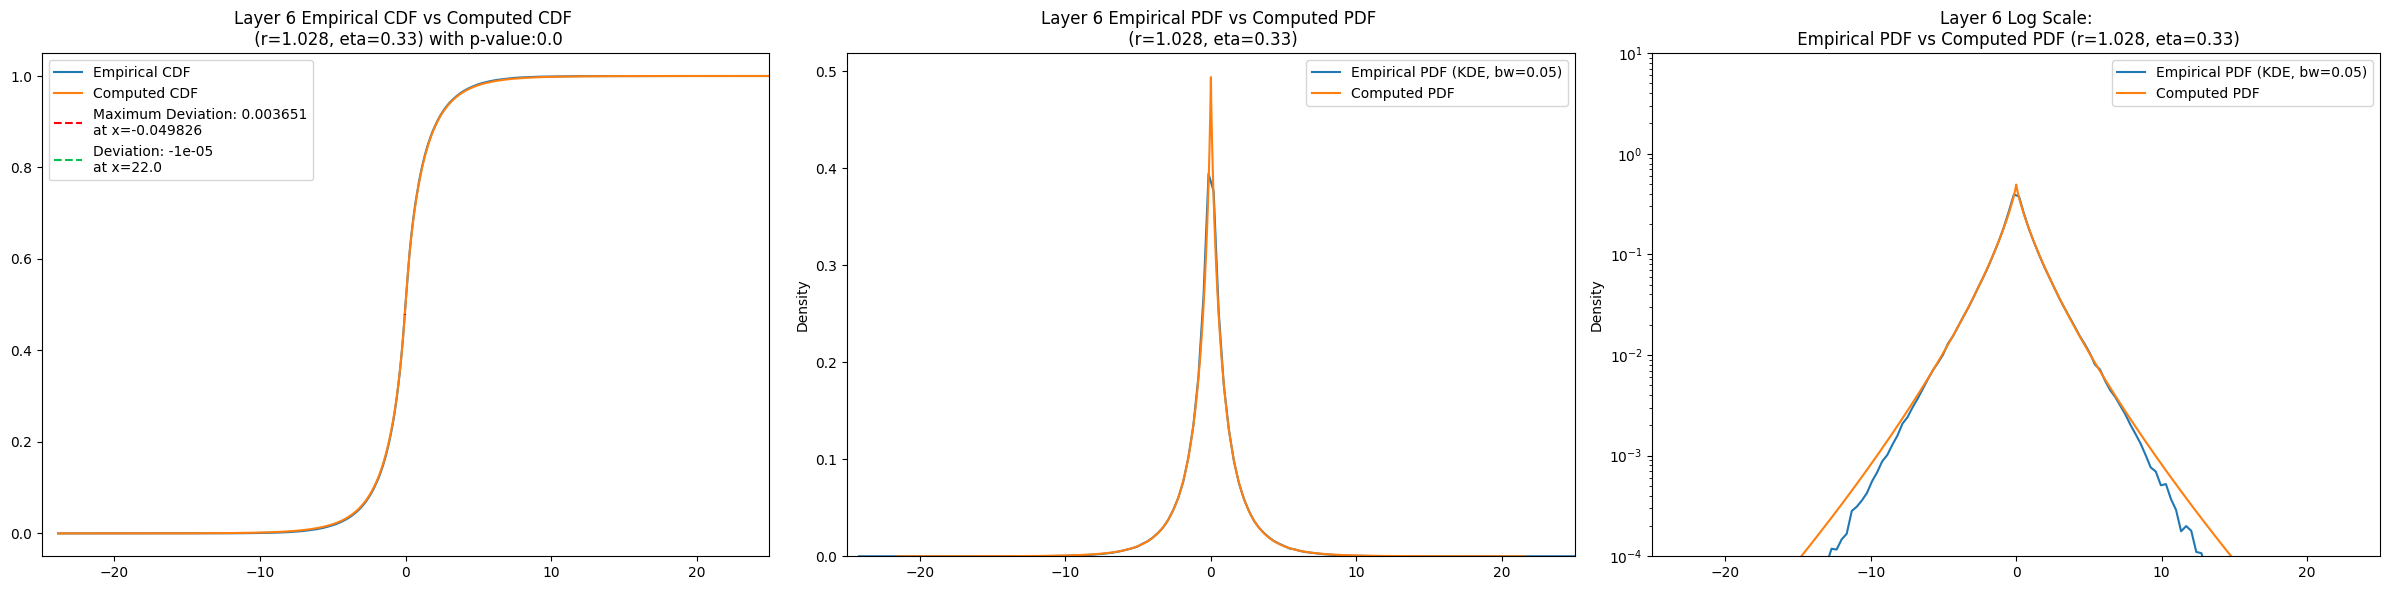

No Tail


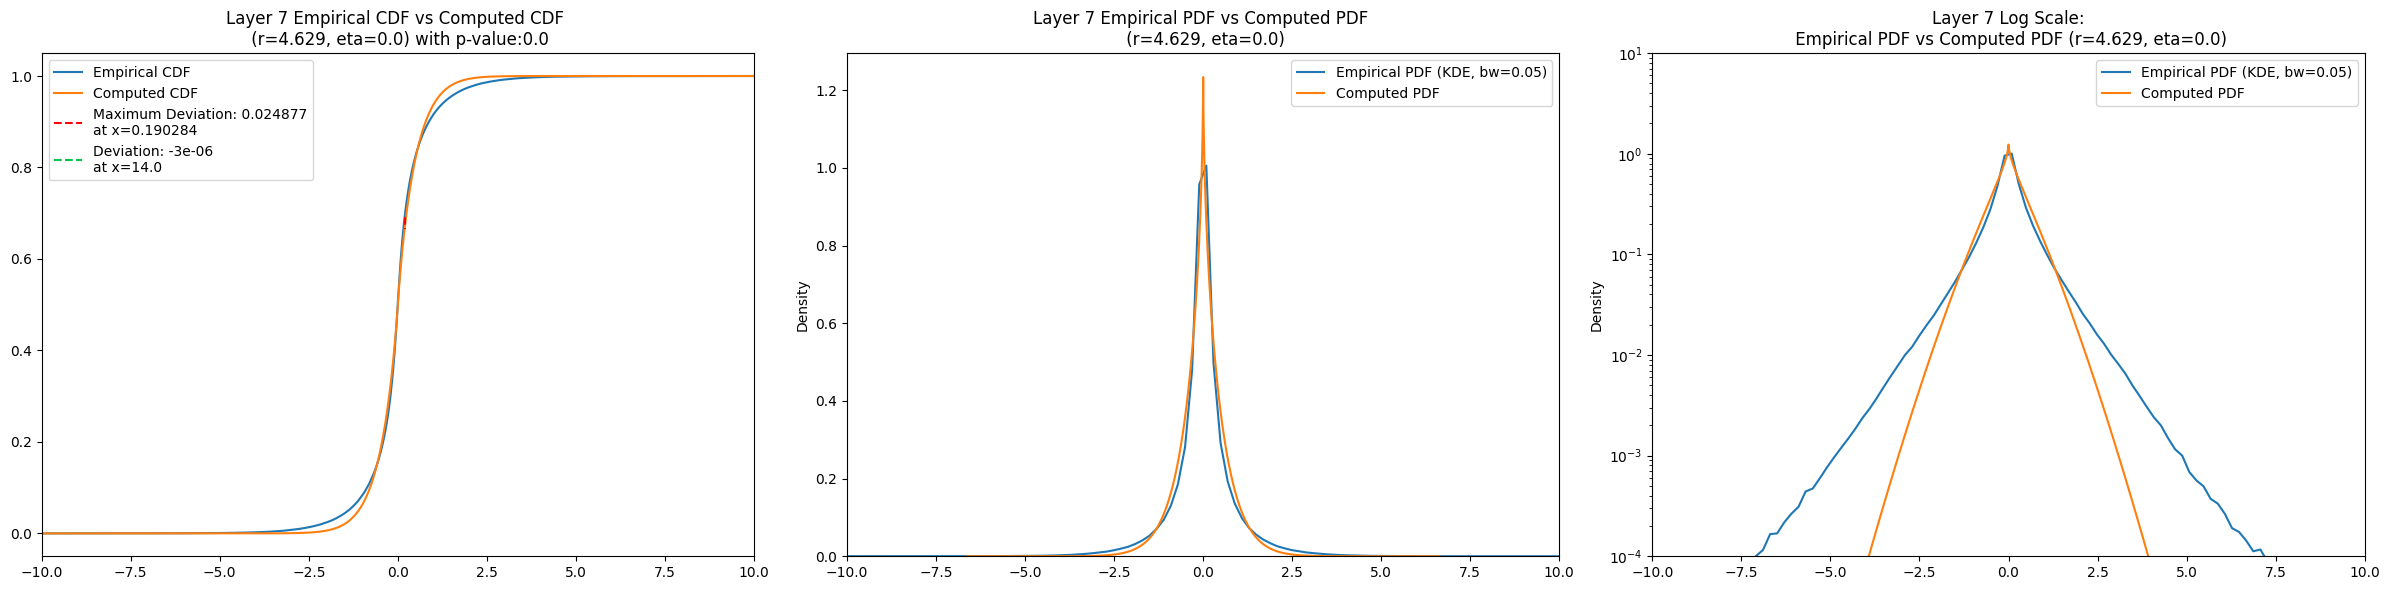

No Tail


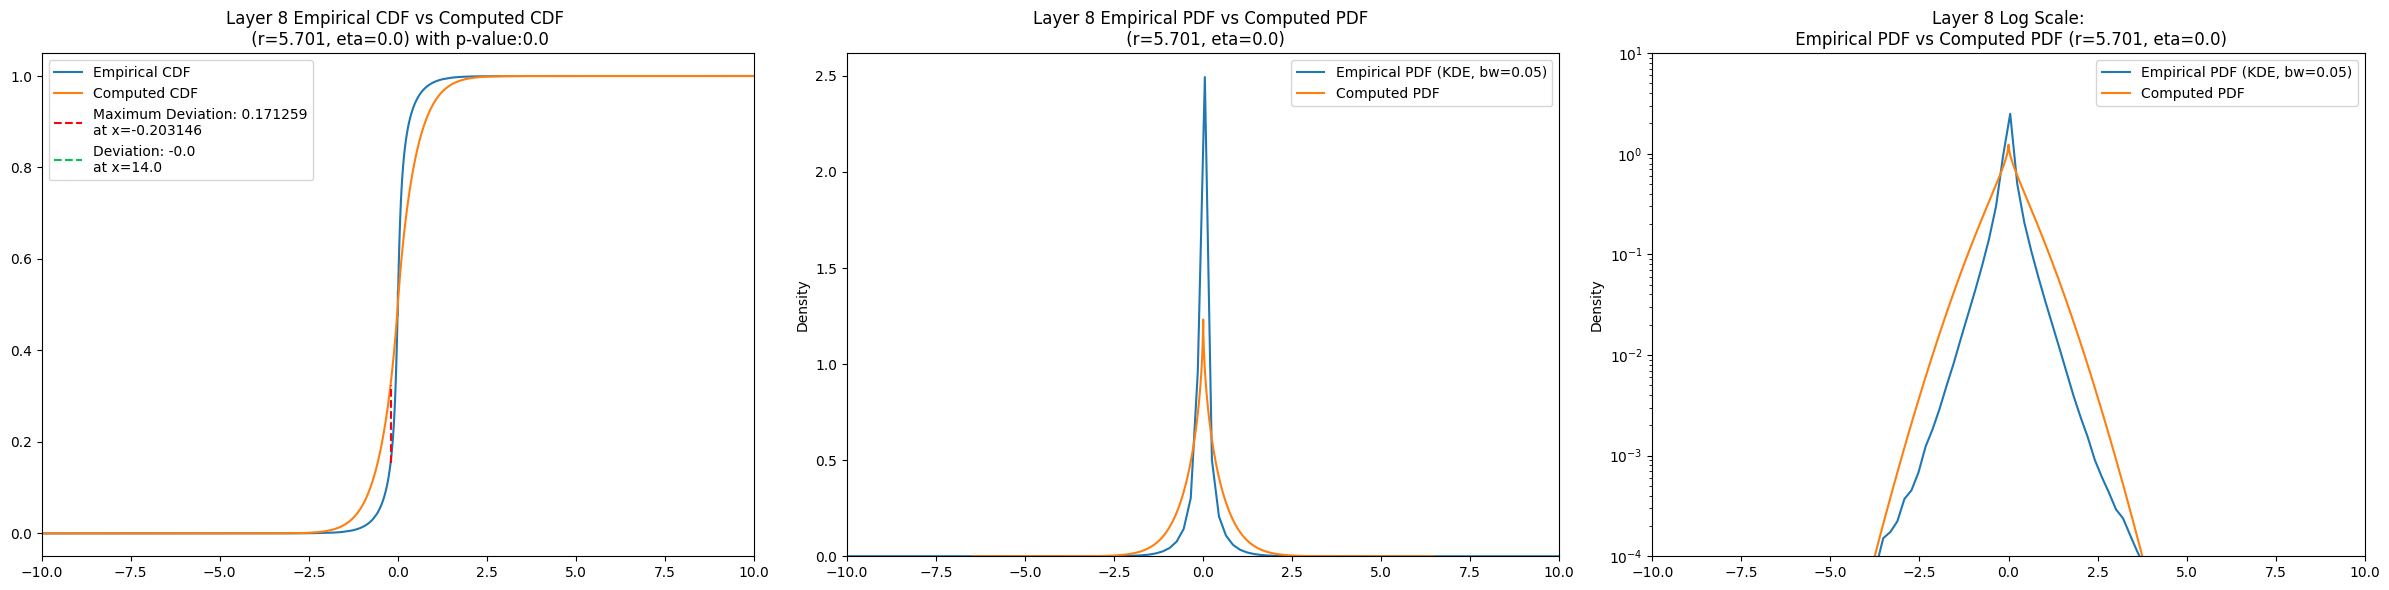

In [26]:
for layer in np.arange(2, 9):
    layer_info = master_df.loc[layer]
    fig = visualize_cdf_pdf(sample = obs_x_dict[layer], 
                    params = (layer_info[f'best_r_d{r_d}'], layer_info[f'best_eta_d{eta_d}']), 
                    log_scale = True,
                    all_cdfs = combine_pickles(f'layer{layer}_10000'),
                    layer = layer,
                    interval = (-(40 - layer//3.1*15), (40 - layer//3.1*15)),
                    provided_loc=(30 - layer//3.1*8))
    fig.savefig(f'{DATA_NAME}/plots/compare_cdf_pdf_layer_{layer}.png', bbox_inches = 'tight')

## Comparing with Gaussian and Laplace

In [ ]:
# def coord_descent_scipy(sample, initial_param):
#     '''
#     '''
#     r_0, eta_0 = initial_param
#     find_r_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_0), method = 'bounded', bounds = (max(0.5, r_0-0.1), r_0+0.1))
#     r_1 = find_r_1['x']
#     find_eta_1 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_eta', r_1), method = 'bounded', bounds = (max(0, eta_0-0.1), eta_0+0.1))
#     eta_1 = find_eta_1['x']
#     find_r_2 = scipy.optimize.minimize_scalar(generate_func(sample, 'gengamma_r', eta_1), method = 'bounded', bounds = (max(0.5, r_1-0.1), r_1+0.1))

#     r_2 = find_r_2['x']

#     return r_2, eta_1, find_r_2['fun']

# for layer in np.arange(2, 9):
#     master_df.loc[layer, f'best_r_scipy'], master_df.loc[layer, f'best_eta_scipy'], master_df.loc[layer, f'kstest_stat_cd_scipy'] = coord_descent_scipy(obs_x_dict[layer], master_df.loc[layer, 'initial_param'])

# master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_cd_scipy.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df


,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,...,best_eta_scipy,kstest_stat_cd_scipy,param_gaussian,kstest_stat_gaussian,param_laplace,kstest_stat_laplace,best_r_d4,kstest_pval_gaussian,kstest_pval_laplace,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,...,3.199999,0.035572,27.782300,0.019503,25.439100,0.036392,0.6020,1.755550e-01,4.282210e-04,6.236650e-04
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,...,3.499982,0.018549,16.031400,0.010128,14.012900,0.022665,0.7048,1.460870e-01,4.151010e-06,3.118640e-04
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,...,2.999992,0.009863,8.001070,0.020474,7.104980,0.014498,0.8026,5.852830e-19,1.017140e-09,9.980180e-05
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,...,1.600006,0.003011,3.590120,0.030175,3.138820,0.002343,0.9011,2.012920e-161,2.134870e-01,4.987300e-02
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,...,0.500005,0.005470,1.426170,0.042370,1.246790,0.014477,1.0280,0.000000e+00,1.233750e-148,7.517230e-10
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,...,0.002368,0.024973,0.539642,0.052925,0.472750,0.025277,4.6290,0.000000e+00,0.000000e+00,0.000000e+00
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,...,0.000007,0.171067,0.196018,0.056353,0.172564,0.029150,5.7010,0.000000e+00,0.000000e+00,0.000000e+00


In [36]:
for layer in np.arange(2, 9):
    norm_result = scipy.optimize.minimize_scalar(generate_func(obs_x_dict[layer], 'gaussian'), method = 'bounded', bounds = (0, 50))
    laplace_result = scipy.optimize.minimize_scalar(generate_func(obs_x_dict[layer], 'laplace'), method = 'bounded', bounds = (0, 50))
    t_result = scipy.optimize.minimize_scalar(generate_func(obs_x_dict[layer], 't'), method = 'bounded', bounds = (0, 50))
    
    master_df.loc[layer, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_gaussian']), 6)

    master_df.loc[layer, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_laplace']), 6)

    master_df.loc[layer, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_laplace']), 6) 

    master_df.loc[layer, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
    master_df.loc[layer, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
    master_df.loc[layer, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(master_df.loc[layer, 'kstest_stat_t']), 6) 

    master_df.loc[layer, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[layer, 'num_samples']).sf(min(master_df.loc[layer, 'kstest_stat_cd'], master_df.loc[layer, 'kstest_stat_cd_scipy'])), 6)

master_df.to_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv')
master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df_post_compare_priors.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,...,kstest_stat_gaussian,param_laplace,kstest_stat_laplace,best_r_d4,kstest_pval_gaussian,kstest_pval_laplace,kstest_pval_gengamma,param_t,kstest_stat_t,kstest_pval_t
layer,,,,,,,,,,,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,...,0.019503,25.439100,0.036392,0.6020,1.755550e-01,4.282210e-04,6.236650e-04,20.752800,0.036305,4.458110e-04
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,...,0.010128,14.012900,0.022665,0.7048,1.460870e-01,4.151010e-06,3.118640e-04,11.277100,0.026410,3.854630e-08
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,...,0.020474,7.104980,0.014498,0.8026,5.852830e-19,1.017140e-09,9.980180e-05,5.719650,0.018489,1.538450e-15
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,...,0.030175,3.138820,0.002343,0.9011,2.012920e-161,2.134870e-01,4.987300e-02,2.574020,0.010572,3.454100e-20
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,...,0.042370,1.246790,0.014477,1.0280,0.000000e+00,1.233750e-148,7.517230e-10,1.010520,0.017937,5.988230e-228
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,...,0.052925,0.472750,0.025277,4.6290,0.000000e+00,0.000000e+00,0.000000e+00,0.378316,0.026436,0.000000e+00
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,...,0.056353,0.172564,0.029150,5.7010,0.000000e+00,0.000000e+00,0.000000e+00,0.137348,0.028144,0.000000e+00


# Examining Tail Behavior

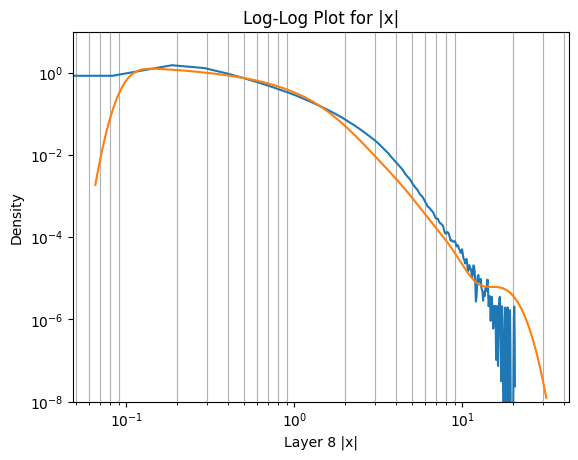

In [30]:
bw = 0.1
layer = 7
x = np.abs(obs_x_dict[layer])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {layer} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_7.png', bbox_inches = 'tight')

bw = 0.2
layer = 8
x = np.abs(obs_x_dict[layer])
fig = sns.kdeplot(x = x[x >= 0.1], bw_method = bw, label = f"Empirical PDF (KDE), bw={bw}")
fig.set_xscale('log')
fig.set_yscale('log')
fig.set_ylim(bottom = 10**-8, top=10)
plt.xlabel(f'Layer {layer} |x|')
plt.title(f'Log-Log Plot for |x|')
plt.grid(True, 'minor')
plt.savefig(f'{DATA_NAME}/plots/log-log_plot_layer_8.png', bbox_inches = 'tight')


In [42]:
def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
    if metric_name == 'kstest_ratio':
        metric = compute_ksratio
    elif metric_name == 'kstest_stat':
        metric = compute_ksstat_tail

    for tail_cutoff in tail_cutoffs:
        metrics = []
        for layer in layers:
            if distro == 'gengamma':
                cdf = all_cdfs[master_df.loc[layer, 'initial_param']]
            elif distro == 'gaussian':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
            elif distro == 'laplace':
                cdf = stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
            elif distro == 't':
                cdf = stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
            metrics.append(metric(obs_x_dict[layer], cdf, tail_cutoff = tail_cutoff))
        master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for layer in np.arange(2, 9):
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))


master_df = pd.read_csv(f'{DATA_NAME}/CSVs/master_df.csv', index_col = 'layer')
master_df['initial_param'] = [tuple(float(i) for i in master_df.loc[layer]['initial_param'][1:-1].split(',')) for layer in master_df.index]
master_df

,num_samples,initial_param,kstest_stat_initial,best_param_eta_0,kstest_stat_eta_0,kstest_stat_cutoff_0.05,best_r_d3,best_eta_d2,kstest_stat_cd,n_pval_0.05,...,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,,,,,,,,,,,,
2,3180,"(0.6, 3.2)",0.038340,"(0.4, 0)",0.102709,0.024030,0.602,3.20,0.036033,1341,...,"(0.023188, 1.0344)","(0.023188, 1.0344)","(0.9368, 1.9545)","(0.9368, 1.9545)","(0.95089, 7.3557)","(0.95089, 7.3557)","(0.015521, 1.04)","(0.015521, 1.04)",0.038340,3.834015e-02
3,12720,"(0.7, 3.5)",0.020230,"(0.4, 0)",0.106739,0.012029,0.705,3.60,0.019689,4770,...,"(0.026952, 1.0742)","(0.026952, 1.0706)","(0.96671, 76.943)","(0.96671, 76.943)","(0.96151, 2839.9)","(0.96151, 2839.9)","(0.0074015, 1.1147)","(0.0074015, 1.1147)",0.020230,1.802446e-02
4,50880,"(0.8, 3.0)",0.011666,"(0.5, 0)",0.061078,0.006018,0.803,3.00,0.010263,16098,...,"(0.035397, 1.0105)","(0.035397, 1.0089)","(0.93633, 391120.0)","(0.97872, 391120.0)","(0.95756, 119260000.0)","(0.95756, 119260000.0)","(0.003275, 1.0744)","(0.003275, 1.0176)",0.011666,1.166561e-02
5,203520,"(0.9, 1.6)",0.003225,"(0.6, 0)",0.040301,0.003010,0.901,1.60,0.003025,203520,...,"(0.17436, 5225.2)","(0.17436, 5225.2)","(0.90723, 9.236e+34)","(0.98075, 9.236e+34)","(0.95007, 9.254e+46)","(0.97884, 9.254e+46)","(0.0034259, 1.0662)","(0.0034259, 1.0104)",0.003225,3.224737e-03
6,814080,"(1.1, 0.5)",0.006844,"(0.9, 0)",0.014370,0.001505,1.030,0.33,0.003651,128142,...,"(0.70499, 73248.0)","(0.70499, 73248.0)","(0.87957, 3.725e+56)","(0.99905, 3.725e+56)","(0.93638, 2.5142e+75)","(0.99905, 2.5142e+75)","(0.0013751, 1.2182)","(0.0013751, 1.0041)",0.002969,2.612471e-04
7,3256320,"(4.6, 0.0)",0.024895,"(4.6, 0)",0.024895,0.000753,4.630,0.00,0.024877,3016,...,"(0.92184, 1911800000.0)","(0.99998, 83877.0)","(0.85009, 2.0712000000000005e+268)","(0.99998, 2.0712000000000005e+268)","(0.90639, inf)","(0.99998, inf)","(0.0015714, 1.506)","(0.0015714, 1.0007)",0.018187,2.426023e-05
8,13025280,"(5.7, 0.0)",0.171259,"(5.7, 0)",0.171259,0.000376,5.700,0.00,0.171259,60,...,"(0.19852, 41045000.0)","(1.0, 3823.9)","(0.83652, inf)","(1.0, inf)","(0.89531, inf)","(1.0, inf)","(0.0028504, 1.7139)","(0.0028504, 1.0001)",0.004163,7.676389e-07


In [52]:

def visualize_cdf_pdf(sample, params, distro = 'gengamma', log_scale = True, n_samples=10000, interval = None, provided_loc = None, all_cdfs=None, layer=None, bw = 0.05, bw_log = 0.05):
    """
    Visualize the gap between the empirical CDF/PDF and the Computed CDF/PDF.

    Args:
        sample (np.ndarray): Observed data.
        r (float): r value.
        eta (float): eta value.
        n_samples (int): Number of samples for the computed CDF/PDF.
        all_cdfs (dict): Dictionary containing computed CDFs.
        layer (int or None): Layer index (for titling purposes).

    Returns:
        distance (float): The Kolmogorov-Smirnov statistic.
        location (float): The location of the maximum deviation between the empirical and computed CDFs.
    """
    xs = np.linspace(np.min(sample), np.max(sample), 10000)
    sample = np.sort(sample)
    n = len(sample)
    
    if distro == 'gengamma':
        r, eta = params
        if all_cdfs and (r, eta) in all_cdfs:
            null_cdf = all_cdfs[(r, eta)]
        else:
            null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples)
        xs_pdf, computed_pdf = compute_prior_pdf(r, eta, tail_bound=0.01)
    elif distro == 'gaussian' or distro == 'normal':
        null_cdf = stats.norm(scale=params).cdf
        xs_pdf = np.linspace(-30, 30, 10000)
        computed_pdf = stats.norm(scale=params).pdf(xs)
    elif distro == 'laplace':
        null_cdf = stats.laplace(scale=params).cdf
        xs_pdf = np.linspace(-30, 30, 10000)
        computed_pdf = stats.laplace(scale=params).pdf(xs)
    elif distro == 't':
        null_cdf = stats.t(df=2,scale=params).cdf
        xs_pdf = np.linspace(-30, 30, 10000)
        computed_pdf = stats.t(df=2, scale=params).pdf(xs)

    if log_scale:

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        ax1.plot(xs, null_cdf(xs), label='Computed CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)

        if provided_loc:
            ax1.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', label=f'Maximum Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', color='xkcd:bright red')
            emp_cdf_at_provided_loc = np.searchsorted(sample, provided_loc, side='right') / n
            computed_cdf_at_provided_loc = null_cdf(provided_loc)
            ax1.vlines(provided_loc, emp_cdf_at_provided_loc, computed_cdf_at_provided_loc, linestyles='--', label=f'Deviation: {np.round(emp_cdf_at_provided_loc - computed_cdf_at_provided_loc, 6)}\nat x={np.round(provided_loc, 6)}', color='xkcd:shamrock green')
        
        if distro == 'gengamma':
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n (r={r}, eta={eta}) with p-value:{np.round(result.pvalue, 8)}')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n (r={r}, eta={eta})')
            ax3.set_title(f'{f"Layer {layer}" if layer else ""} Log Scale:\n Empirical PDF vs Computed PDF (r={r}, eta={eta})')
        else:
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n {distro} (0, {params})')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n {distro} (0, {params})')
            ax3.set_title(f'{f"Layer {layer}" if layer else ""} Log Scale:\n Empirical PDF vs Computed PDF {distro} (0, {params})')

        # Empirical PDF vs Computed PDF
        ax2.set_xlim(left = -30, right = 30)
        if interval:
            ax2.set_xlim(left = interval[0], right = interval[1])
        
        sns.kdeplot(sample, bw_method = bw, ax=ax2, label=f'Empirical PDF (KDE, bw={bw})')
        ax2.plot(xs_pdf, computed_pdf, label='Computed PDF')
        
        # Log Scale
        ax3.set_xlim(left = -30, right = 30)
        if interval:
            ax3.set_xlim(left = interval[0], right = interval[1])
        ax3.set_ylim(bottom = 10**-4, top=10)
        sns.kdeplot(ax = ax3, x = sample, bw_method = bw, log_scale=[False, True], label = f"Empirical PDF (KDE, bw={bw_log})")
        ax3.plot(xs_pdf, computed_pdf, label = "Computed PDF")

        ax1.legend()
        ax2.legend()
        ax3.legend()

        plt.tight_layout()
        plt.show()

    else:

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        ax1.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        ax1.plot(xs, null_cdf(xs), label='Computed CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)
        ax1.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', label=f'Maximum Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', color='xkcd:bright red')
        if distro =='gengamma':
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n (r={r}, eta={eta}) with p-value:{np.round(result.pvalue, 8)}')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n (r={r}, eta={eta})')
        else:
            ax1.set_title(f'{f"Layer {layer}" if layer else ""} Empirical CDF vs Computed CDF \n {distro} (0, {params})')
            ax2.set_title(f'{f"Layer {layer}" if layer else ""} Empirical PDF vs Computed PDF \n {distro} (0, {params})')
        ax1.legend()

        # Empirical PDF vs Computed PDF
        ax2.set_xlim(left = -25, right = 25)
        sns.kdeplot(sample, bw_method = bw, ax=ax2, label=f'Empirical PDF (KDE, bw={bw})')
        ax2.plot(xs_pdf, computed_pdf, label='Computed PDF')
        ax2.legend()
    
    return fig

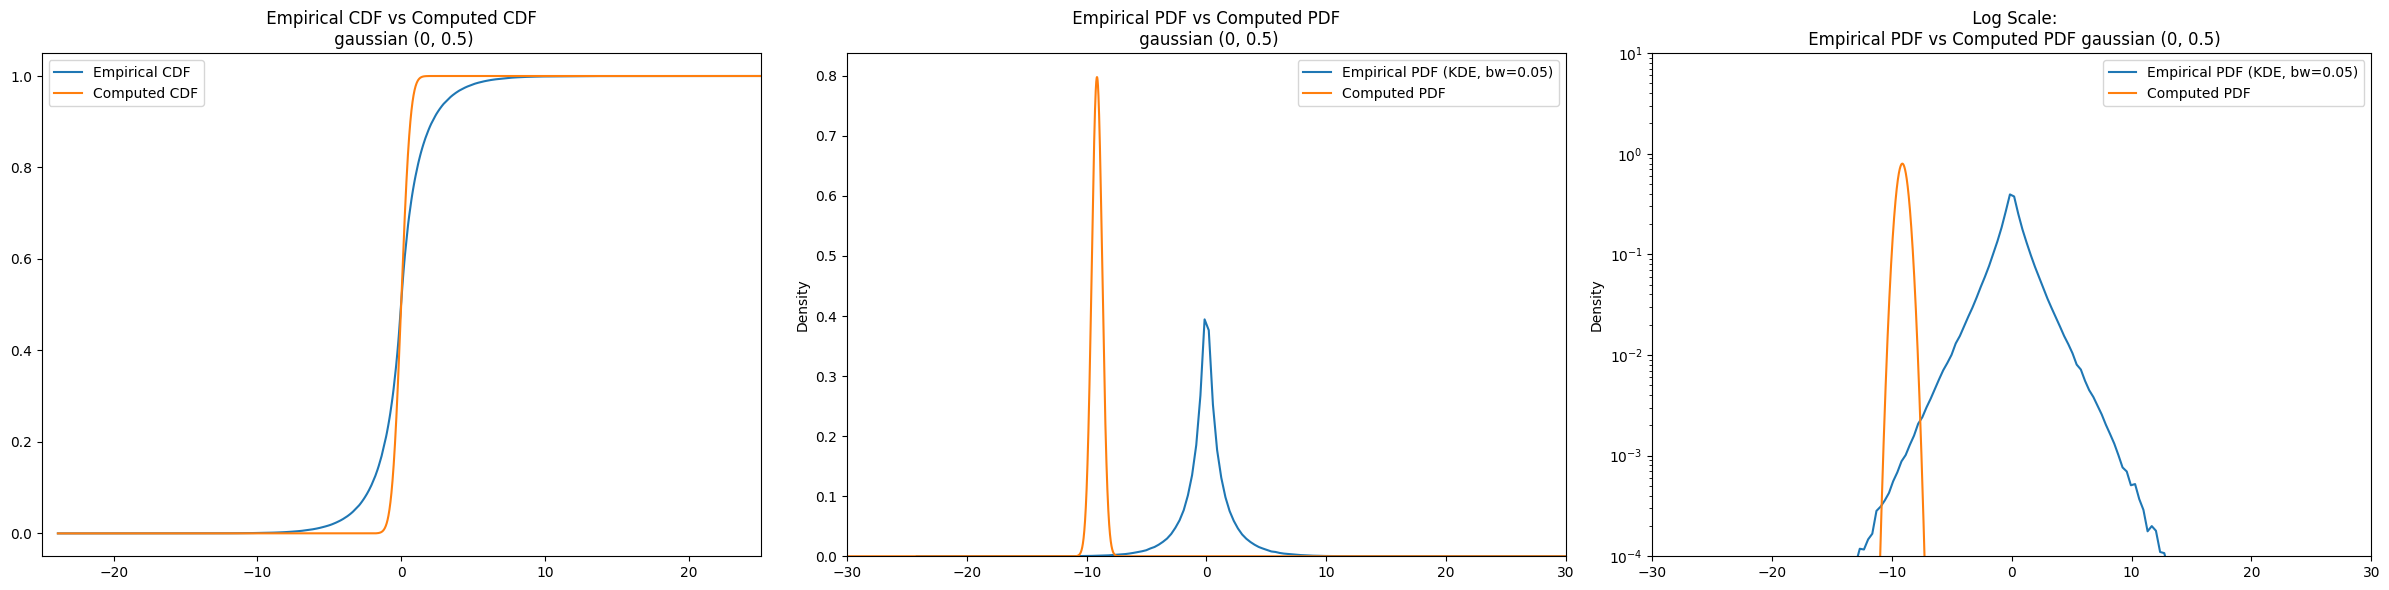

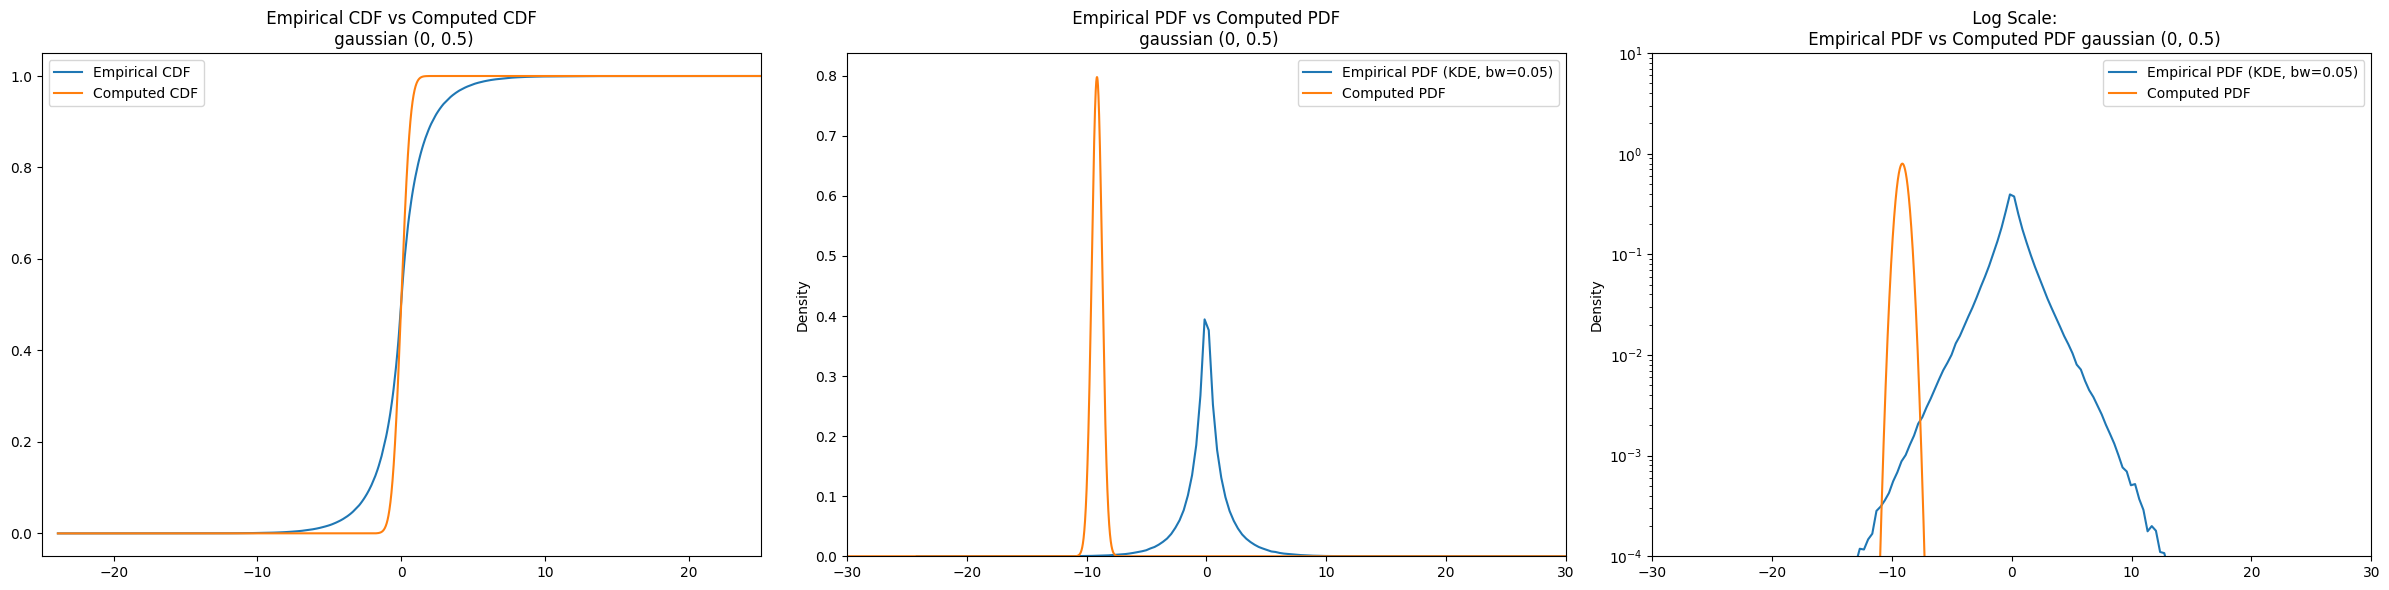

In [54]:
visualize_cdf_pdf(obs_x_dict[6], params=0.5, distro='gaussian')

In [44]:
#master_df.filter(regex='num_samples|kstest_stat.*')
# master_df.filter(regex='num_samples|best.*')
# master_df.filter(regex='.*gaussian')
#master_df#.filter(regex='kstest_pval.*')
master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,kstest_ratio_gengamma_tail0,kstest_ratio_gengamma_tail10,kstest_ratio_gaussian_tail0,kstest_ratio_gaussian_tail10,kstest_ratio_laplace_tail0,kstest_ratio_laplace_tail10,kstest_ratio_t_tail0,kstest_ratio_t_tail10,kstest_stat_gengamma_tail2,kstest_stat_gengamma_tail10
layer,,,,,,,,,,
2,"(0.023188, 1.0344)","(0.023188, 1.0344)","(0.9368, 1.9545)","(0.9368, 1.9545)","(0.95089, 7.3557)","(0.95089, 7.3557)","(0.015521, 1.04)","(0.015521, 1.04)",0.038340,3.834015e-02
3,"(0.026952, 1.0742)","(0.026952, 1.0706)","(0.96671, 76.943)","(0.96671, 76.943)","(0.96151, 2839.9)","(0.96151, 2839.9)","(0.0074015, 1.1147)","(0.0074015, 1.1147)",0.020230,1.802446e-02
4,"(0.035397, 1.0105)","(0.035397, 1.0089)","(0.93633, 391120.0)","(0.97872, 391120.0)","(0.95756, 119260000.0)","(0.95756, 119260000.0)","(0.003275, 1.0744)","(0.003275, 1.0176)",0.011666,1.166561e-02
5,"(0.17436, 5225.2)","(0.17436, 5225.2)","(0.90723, 9.236e+34)","(0.98075, 9.236e+34)","(0.95007, 9.254e+46)","(0.97884, 9.254e+46)","(0.0034259, 1.0662)","(0.0034259, 1.0104)",0.003225,3.224737e-03
6,"(0.70499, 73248.0)","(0.70499, 73248.0)","(0.87957, 3.725e+56)","(0.99905, 3.725e+56)","(0.93638, 2.5142e+75)","(0.99905, 2.5142e+75)","(0.0013751, 1.2182)","(0.0013751, 1.0041)",0.002969,2.612471e-04
7,"(0.92184, 1911800000.0)","(0.99998, 83877.0)","(0.85009, 2.0712000000000005e+268)","(0.99998, 2.0712000000000005e+268)","(0.90639, inf)","(0.99998, inf)","(0.0015714, 1.506)","(0.0015714, 1.0007)",0.018187,2.426023e-05
8,"(0.19852, 41045000.0)","(1.0, 3823.9)","(0.83652, inf)","(1.0, inf)","(0.89531, inf)","(1.0, inf)","(0.0028504, 1.7139)","(0.0028504, 1.0001)",0.004163,7.676389e-07
